In [59]:
class Bee:
    def __init__(self, n1, a, b):
        self.n1 = n1
        self.a = a
        self.b = b
        if self.b !=0:
            self.intersection = (self.a-1)/self.b
        else:
            self.intersection = 0
    def next_day(self, n):
        return self.a*n - self.b*n**2
    def limit(self, eps, steps):
        if self.b == 0:
            if self.a > 1:
                return -1
            else:
                if self.a == 1:
                    return self.n1
                else:
                    return 0
        current_ = self.n1
        next_ = self.next_day(current_)
        i = 1
        while eps < abs(current_ - next_):
            i = i + 1
            #print(current_, next_, sep = ', ')
            if current_ < 0:
                return 0
            if i > steps:
                if abs(current_ - self.intersection) < abs(current_):
                    return self.intersection
                else:
                    return 0
            current_ = next_
            next_ = self.next_day(current_)
        return current_

In [60]:
population = Bee(2., 3., 2.)

In [61]:
population.next_day(1.)

1.0

In [62]:
population.limit(1.0e-10, 1e+6)

0

In [63]:
f = open('tests.txt')
data = [list(map(lambda x: float(x), line.rstrip().split(' '))) for line in f]
number_examples = data[0]
del data[0]
data

[[0.5, 1.0, 1.0],
 [10.0, 1.0, 2.0],
 [0.5, 1.5, 1.0],
 [0.1, 2.0, 2.0],
 [0.5, 1.5, 0.5],
 [0.5, 3.0, 1.0],
 [0.5, 3.0, 2.0],
 [1.717, 1.121, 1.439],
 [0.679, 1.636, 1.189],
 [4.593, 1.357, 1.232],
 [0.076, 0.364, 0.308],
 [2.759, 2.018, 0.691],
 [1.047, 1.071, 0.0],
 [0.0, 0.0, 2.446],
 [1.728, 2.909, 1.622],
 [0.291, 2.182, 2.231],
 [0.307, 0.727, 1.598],
 [6.418, 1.155, 2.908],
 [0.648, 1.455, 1.604],
 [0.679, 1.273, 1.292],
 [0.272, 2.455, 1.799],
 [0.718, 2.364, 1.592],
 [0.093, 0.636, 1.668],
 [0.813, 2.636, 2.769],
 [0.34, 0.909, 2.37],
 [0.024, 0.091, 2.514],
 [0.287, 1.0, 1.664],
 [0.133, 1.364, 2.018],
 [2.321, 1.545, 0.513],
 [0.456, 2.0, 2.328],
 [1.473, 2.818, 1.266],
 [0.049, 1.091, 0.995],
 [0.048, 0.182, 1.938],
 [0.103, 0.818, 1.495],
 [0.348, 0.545, 0.678],
 [0.372, 1.818, 2.625],
 [2.345, 2.091, 0.567],
 [0.264, 0.273, 0.635],
 [0.157, 1.909, 2.847],
 [0.391, 0.455, 0.881],
 [2.233, 2.545, 0.902],
 [0.258, 1.182, 1.103],
 [0.394, 2.464, 0.0],
 [1.695, 0.42, 0.0],
 [

In [64]:
import matplotlib.pyplot as plt

In [65]:
def plot_example(example, steps):
    population_ = Bee(example[0], example[1], example[2])
    n_i = [example[0]]
    n_i1 = []
    distance = []
    for i in range(0, steps):
        n_i1.append(population_.next_day(n_i[i]))
        n_i.append(n_i1[i])
        distance.append(abs(n_i1[i] - n_i[i]))
    n_i1.append(population_.next_day(n_i[-1]))
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(n_i, n_i1, s = 5.0)

    plt.subplot(122)
    plt.plot(distance)
    print(distance[-1])

0.0141293102918989


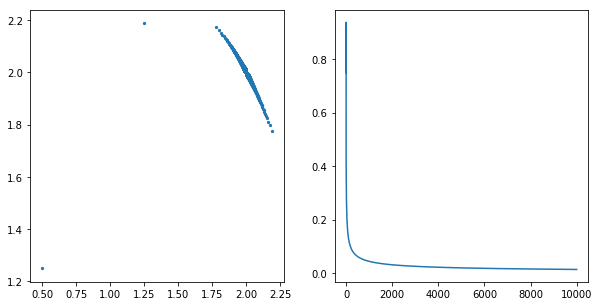

In [66]:
plot_example(data[5], 10000)

5.997632205582851e-09


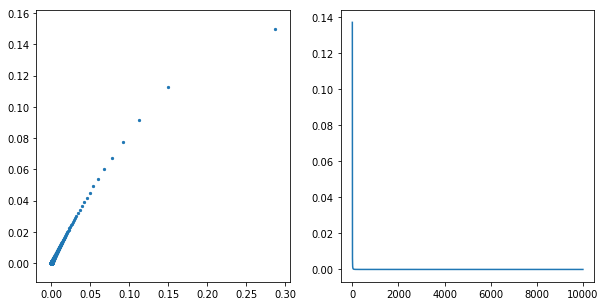

In [67]:
plot_example(data[26], 10000)

In [68]:
results = []
for example in data:
    population_ = Bee(example[0], example[1], example[2])
    results.append(population_.limit(1.0e-10, 1e+7))
    print(results[-1], population_.intersection, sep = ', ')

9.99997190837277e-06, 0.0
0, 0.0
0.5, 0.5
0.499999999999803, 0.5
0.999999999893363, 1.0
2.0, 2.0
1.0, 1.0
0, 0.08408617095205002
0.5349032801775988, 0.5349032800672833
0, 0.28977272727272724
1.1456017219640477e-10, -2.064935064935065
1.4732272070376813, 1.4732272069464543
-1, 0
0.0, -0.4088307440719542
1.1769420469042546, 1.1769420468557334
0.5298072613015373, 0.5298072613177948
2.998277135063134e-10, -0.17083854818523153
0, 0.0533012379642366
0.28366583521652006, 0.28366583541147133
0.2113003098759179, 0.21130030959752313
0.8087826569688039, 0.8087826570316844
0.8567839196330362, 0.8567839195979898
1.8475695097381955e-10, -0.2182254196642686
0.5908270134086786, 0.5908270133622247
1.0580167156897702e-09, -0.038396624472573825
3.718283524534719e-11, -0.36157517899761343
7.75213862753378e-06, 0.0
0.18037661023686608, 0.180376610505451
1.0623781675320334, 1.0623781676413253
0.4295532645161246, 0.429553264604811
1.4360189573936402, 1.4360189573459716
0.09145728540542405, 0.0914572864321607

In [56]:
results[26]

7.75213862753378e-06

In [69]:
data[26]

[0.287, 1.0, 1.664]

In [79]:
evgeniy = open('evgeniy.txt')
evgeniy_results = [float(line) for line in evgeniy]
[x-y for x,y in zip(evgeniy_results, results)]

[-9.99997190837277e-06,
 0.0,
 0.0,
 1.9700907571973403e-13,
 1.0663703253754875e-10,
 0.0,
 0.0,
 0.0,
 -1.775988245356075e-10,
 0.0,
 -1.1456017219640477e-10,
 -7.03768132659377e-09,
 0.0,
 0.0,
 -4.6904254702440085e-08,
 -1.3015373223623783e-09,
 -2.998277135063134e-10,
 0.0,
 4.783479945480451e-09,
 1.240820779457863e-10,
 3.031196071923148e-09,
 3.669637926861924e-10,
 -1.8475695097381955e-10,
 -3.408678561633849e-09,
 -1.0580167156897702e-09,
 -3.718283524534719e-11,
 -7.75213862753378e-06,
 -2.3686608230377715e-10,
 3.2467966537552684e-08,
 -4.5161245854075105e-09,
 4.260635977360039e-08,
 -4.054240554385302e-10,
 -2.930104852226673e-11,
 -4.5426242360309263e-10,
 -1.6279254907604608e-10,
 2.3257747949756435e-09,
 4.2593793159184656e-08,
 -8.867191662325321e-11,
 3.761718825323612e-09,
 -1.048086392780832e-10,
 -1.0462473554184726e-08,
 -3.5961013888918814e-09,
 0.0,
 0.0,
 3.6885536847108824e-09,
 0.0,
 0.0,
 -3.463244779844388e-08,
 0.0,
 -3.508444090805085e-09]

In [82]:
output = open('my_result.txt', 'w')
for result in results:
    output.write(str(result) + '\n')
output.close()

In [5]:
from scipy.stats import binom
import math
from scipy.stats import multinomial
import numpy as np

In [6]:
sequencer = multinomial(10, [1- 0.050, (0.050)/3, (0.050)/3, (0.050)/3])
print(sequencer.pmf([2, 1, 3, 4])*2)
print(sequencer.pmf([2, 3, 3, 2]))
print(sequencer.pmf([2, 2, 2, 4]))

1.3540594993141106e-10
1.3540594993141228e-10
1.015544624485586e-10


In [7]:
class Sequence_t:
    def __init__(self, L, n, p, k):
        self.L = L
        self.n = n
        self.p = p
        self.k = k
        self.read_probability = [binom.pmf(i,self.k,self.n/self.L) for i in range(self.k+1)]
    def prob_bad_nucleotide(self, n, p):
        bad_prob = 0  
        bad_prob += binom.sf(math.floor(n/2), n, p)
        if n % 2 == 0:
            bad_prob += binom.pmf(n/2, n, p)*0.5
        return bad_prob
    def sum_err(self, prob_bad_nucleotide):
        one_nucl_err = self.read_probability[0]*0.75
        for k in range(1, self.k+1):
            if (self.read_probability[k])*(self.k*self.L) >= 10e-6:
                bad_prob = prob_bad_nucleotide(k, self.p)
                one_nucl_err += bad_prob*self.read_probability[k]    
        return self.L*one_nucl_err

In [8]:
def prob_bad_nucleotide(k, p):
    sequencer = multinomial(k, [1-p, (p)/3, (p)/3, (p)/3])
    fault_tmp = 0
    x = range(0, k+1)
    for e in range(0, k+1):
        for i in range(0, k+1):
            for s in range(0, k+1):
                for r in range(0, k+1):
                    if (i + s + r + e == k):
                        if ((i >= s and i >= r and i > e) or \
                        (s >= i and s >= r and s > e) or (r >= i and r >= s and r > e)):
                        #    fault_tmp += 10e-20
                                fault_tmp += sequencer.pmf([e, i, s, r])
                        elif((i == e and i > r and i > s) or \
                        (s == e and s > i and s > r) or (r == e and r > s and r > i)):
                        #    fault_tmp += 10e-20
                                fault_tmp += sequencer.pmf([e, i, s, r]) * 0.5
                        elif ((i == e and s == e and i > r) or \
                        (s == e and r == e and s > i) or (r == e and i == e and r > s)):
                        #    fault_tmp += 10e-20
                                fault_tmp += sequencer.pmf([e, i, s, r]) * 2 / 3.0
                        elif (i == e and s == e and r == e):
                        #    fault_tmp += 10e-20
                                fault_tmp += sequencer.pmf([e, i, s, r]) * 0.75
    return fault_tmp

In [9]:
sequences_f = open('2.txt')
sequences = [list(map(lambda x: float(x), line.rstrip().split(' '))) for line in sequences_f]
del sequences[0]
sequences

[[3.0, 2.0, 0.0, 1.0],
 [3.0, 2.0, 0.0, 2.0],
 [15.0, 6.0, 0.005, 10.0],
 [15.0, 3.0, 0.027, 18.0],
 [31.0, 5.0, 0.054, 43.0],
 [81.0, 17.0, 0.085, 80.0],
 [210.0, 11.0, 0.034, 92.0],
 [321.0, 60.0, 0.016, 99.0],
 [711.0, 36.0, 0.088, 120.0],
 [1693.0, 62.0, 0.001, 150.0]]

In [10]:
results = []
for sequence in sequences:
    Sequence = Sequence_t(int(sequence[0]), int(sequence[1]), sequence[2], int(sequence[3]))
    results.append(Sequence.sum_err(prob_bad_nucleotide))
    print(results[-1])

0.75
0.25000000000000006
0.08040206039130798
0.31372053562685387
0.07046934731346188
0.0003522655019140977
2.1591633796667775
4.546154697592807e-06
6.663244575950779
4.850696809279941


In [13]:
sequencer = multinomial(150, [1- 0.001, (0.001)/3, (0.001)/3, (0.001)/3])
sum = 0
for i in range(0, 100000):
    sum += sequencer.pmf([39, 37, 37, 37])
print(sum)

1.1315988084405857e-294
